# Basic Introduction 

There are many great libraries for doing sequential decision-making (e.g., reinforcement learning and planning) out there. This one is designed to facilitate __modular__ and __interactive__ testing of agents on tasks. In particular, this package is designed around making transparent the inner workings of agents, environments, and their interaction through visualization tools and simple interfaces.

This tutorial is designed to familiarize new users with the basics.

# Tasks and visualization

Lets make a simple gridworld task.

In [1]:
from msdm.domains import GridWorld

#these are the default parameters for gridworlds that we'll use in this tutorial
defaultparams = dict(
    initial_features=('s',),
    absorbing_features=('g',),
    wall_features=('#',),
    default_features=('.',),
    feature_rewards={
        'g': 0,
        'x': -20
    },
    step_cost=-1,
)

gw = GridWorld(
    tile_array=[
        '..#..g',
        '..#...',
        '..#...',
        's.....',
    ],
    **defaultparams
)

Now, lets look at it!

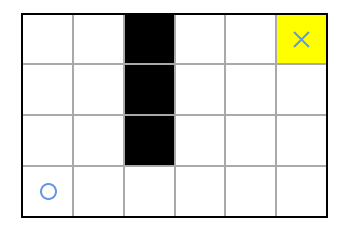

In [2]:
gw.plot()

Walls are the black tiles, while the yellow tile is the goal. Also, the start state is marked with a circle, and the only absorbing state (in this case, the goal) is marked with an x.

Lets make another gridworld with lava instead of walls blocking the route to the goal. To do this, we replace the `#`'s in the tileArray matrix with `x`'s.

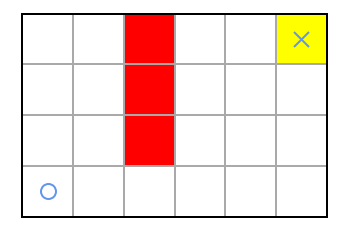

In [3]:
gwlava = GridWorld(
    tile_array=[
        '..x..g',
        '..x...',
        '..x...',
        's.....',
    ],
    **defaultparams
)
gwlava.plot()

Great! Now that we have tasks, we want to have an agent actually __do__ something with them. Since these are very small tasks (<30 states), we can solve them directly via planning. To do this, we'll use an algorithm called _value iteration_, which you can read more about [here](https://artint.info/html/ArtInt_227.html#:~:text=Value%20iteration%20is%20a%20method,either%20Q*%20or%20V*.).

In the next block, we'll create a value iteration object, and then give it the `gw` task to plan on. Calling `vi.planOn` returns a `Result` object that contains all the relevant information about the algorithm that was run, including results.

In [4]:
from msdm.algorithms import VectorizedValueIteration

vi = VectorizedValueIteration()
res = vi.plan_on(gw)

We can inspect the contents of the result object like this:

In [5]:
res.__dict__.keys()

dict_keys(['mdp', 'policy', 'pi', '_valuevec', 'valuefunc', 'V', '_qvaluemat', 'actionvaluefunc', 'Q'])

Now that we have the results `res` of running `vi` on the task, we can look at how it interacts with `gw`. A single interaction is often called a __trajectory__. 

Notice that we first access `res.policy`.

In [6]:
traj = res.policy.run_on(gw)

Let's see how it looks in the grid.

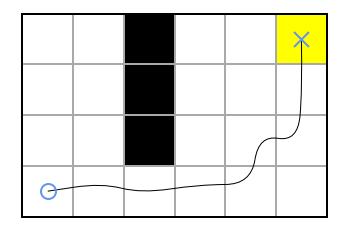

In [7]:
gw.plot().plot_trajectory(traj['stateTraj'])

Now, lets run the agent multiple times look at the __distribution__ of trajectories.

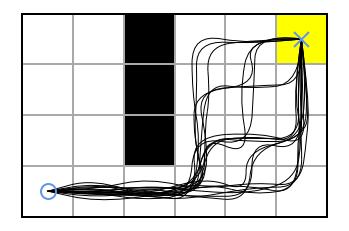

In [8]:
trajs = [res.policy.run_on(gw) for _ in range(20)]
gwp = gw.plot()
for traj in trajs:
    gwp.plot_trajectory(traj['stateTraj'])

The plotting tools are designed to provide a lot of flexibility. For example, suppose we have a more complex gridworld with different start states and (for whatever reason) want to keep track of where the agent started on each episode. We could do something like this:

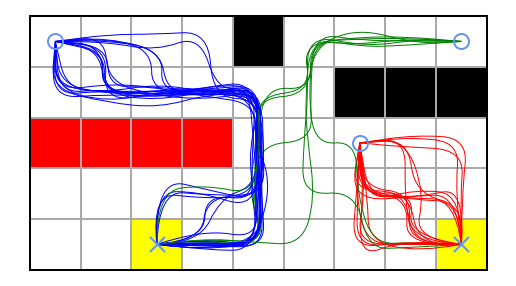

In [9]:
gwstarts = GridWorld(
    tile_array=[
        's...#...s',
        '......###',
        'xxxx..s..',
        '.........',
        '..g.....g',
    ],
    **defaultparams
)

vistarts = VectorizedValueIteration()
startsres = vistarts.plan_on(gwstarts)

gwp = gwstarts.plot()
for _ in range(50):
    traj = startsres.policy.run_on(gwstarts)
    straj = traj['stateTraj']
    
    if straj[0] == gwstarts.initial_states[0]:
        color = 'blue'
    elif straj[0] == gwstarts.initial_states[1]:
        color = 'red'
    elif straj[0] == gwstarts.initial_states[2]:
        color = 'green'
    gwp.pT(straj, color=color) #shortcut for plotting trajectories

Value iteration also gives us a __value function__ and a __stationary policy__, which we can visualize like so:

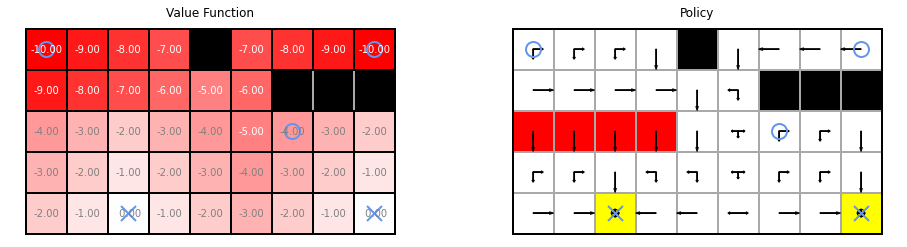

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
gwstarts.plot(ax=axes[0]).plot_state_map(startsres.valuefunc).title("Value Function")
gwstarts.plot(ax=axes[1]).plot_policy(startsres.policy).title("Policy")

# More on how MDPs are represented

- state/action representation
- transition function / reward function / initial state functions / action distributions
- distributions
- writing your own MDPs

# Learning

- show q-learning in action

# Partial observability, multiple agents, and beyond
